## Balancing Impact Notebook

---

### Objective:

- Given the chosen sampling rate, extraction interval and selected features, to assess the impact of different balancing strategies on the performance of the model.
- To determine the optimal balancing strategies for the model.

### Methodology:

- A model (RF, SVM, LR) is trained with selected features.
- The model is trained with 80% of the data and tested with the remaining 20%.

#### Findings:

Selected Features prior to the correlation analysis:

| Type                | N° Features |
| ------------------- | ---------- |
| MFCC                | 30         |
| CQT                 | 70         |
| Chroma              | 12         |
| RMS                 | 40         |
| Zero Crossing Rates | 40         |
| Spectral Centroid   | 40         |
| Spectral Bandwidth  | 60         |
| Spectral Rolloff    | 40         |


Selected Features after the correlation analysis:


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tqdm.notebook as tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")
import seaborn as sns

sns.set_theme(context="paper", font_scale=1)

In [46]:
# set the paths
BASE_DIR = "../../dataset/"
LABELS = BASE_DIR + "labels.csv"

# features
FEATURES_BASE = "../../features/"
#FEATURES = FEATURES_BASE + "raw/"
FEATURES = FEATURES_BASE + 'balanced/posteriori/'
#FEATURES = FEATURES_BASE + 'balanced/priori/'
#FEATURES = FEATURES_BASE + 'balanced/both/'

# Models
MODELS = "../../models/"
MODELS_RESULTS = MODELS + "results/"

# report
PAPER = "../../paper/"
IMAGES_PATH = PAPER + "images/"

# HYERPARAMETERS
SEED = 42
INTERVAL = 2

RESULT_NAME = "results_balancing_comparison_macrof1_train.csv"
BALANCING_TYPE = "posteriori"
COMPLETE_DATA_PRIOR_CORR_NAME = f'full_data_{BALANCING_TYPE}_bal_{INTERVAL}s_4000hz_30mfcc_12chroma_70cqt_41rms_41zcr_41sc_61sb_41sr.npy'

In [ ]:
# -----------------------------------------Constants-----------------------------------------
SEED = 42
full_data_dict_keys = ["artifacts", "extrahls", "murmurs", "normals", "extrastoles"]
interval = INTERVAL  # You need to define INTERVAL somewhere
sample_rates = ["mix", 4000]
num_feats = {
    "30 MFCC": "30mfcc",
    "12  Chroma": "12chroma",
    "70 CQT": "70cqt",
    "40 RMS": "41rms",
    "40 Zero Crossing Rates": "41zcr",
    "40 Spectral Centroid": "41sc",
    "60 Spectral Bandwidth": "61sb",
    "40 Spectral Rolloff": "41sr",
}

### FEATURES EXTRACTION - CHOSE THE CORRECT ONE

In [ ]:
# -------------------------- PRIORI BALANCED AND NONE VERSION -----------------------------------------

# create a unique dataset
full_X = []
full_y = []
for name,num_feat in num_feats.items():
     print(f"Processing 4000hz_{num_feat}")

     # Load the data
     FEATURES_NAME = f"full_data_{interval}s_4000hz_{num_feat}.npy"
     full_data = np.load(FEATURES + FEATURES_NAME, allow_pickle=True).item()

     # Extract data from the dictionary
     data_list = []
     X_list = []
     y_list = []
     for key in full_data_dict_keys:
          X = full_data[key]["X"] # (n_samples_class_key, num_feat)
          y = full_data[key]["y"] # (n_samples_class_key,)
          X_list.append(X) 
          y_list.append(y)
     full_X.append(np.concatenate(X_list, axis=0)) # (n_samples, num_feat)
     full_y = np.concatenate(y_list, axis=0) # (n_samples,)
     print(f"Shape of X: {full_X[-1].shape}\n")
features = np.hstack(full_X) # (n_samples, num_feats_total)

# Concatenate all the features
full_data_array = np.hstack((features, full_y.reshape(-1, 1)))
print(f"Shape of full_data_array: {full_data_array.shape}")

# split the data
X = full_data_array[:, :-1]
y = full_data_array[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# create the full dict
full_dict = {
     'train' : {
     'X' : X_train,
     'y' : y_train
},
     'test' : {
     'X' : X_test,
     'y' : y_test
}
}

# save the data
np.save(FEATURES + COMPLETE_DATA_PRIOR_CORR_NAME, full_dict)

In [ ]:
# -------------------------- POSTERIORI BALANCED AND BOTH VERSION -----------------------------------------

# create a unique dataset - for posteriori balancing since this latter has a different structure of the data dictionary with all classes already splitted in train and test
full_data_dict_keys = ['train_bal', 'test']

X_list_test = []
y_list_test = []
X_list_train = []
y_list_train = []

for name,num_feat in num_feats.items():
     print(f"Processing 4000hz_{num_feat}")

     # Load the data
     FEATURES_NAME = f"full_data_{interval}s_4000hz_{num_feat}.npy"
     full_data = np.load(FEATURES + FEATURES_NAME, allow_pickle=True).item()

     # Extract data from the dictionary

     
     
     X_train = full_data['train_bal']["X"] # (n_samples, num_feat)
     y_train = full_data['train_bal']["y"] # (n_samples,)
     X_list_train.append(X_train)
     
     X_test = full_data['test']["X"] # (n_samples, num_feat)
     y_test = full_data['test']["y"] # (n_samples,)
     X_list_test.append(X_test)
     
X_train = np.hstack(X_list_train) # (n_samples, num_feats_total)
X_test = np.hstack(X_list_test) # (n_samples, num_feats_total)

# create the full dict
full_dict = {
     'train' : {
     'X' : X_train,
     'y' : y_train
},
     'test' : {
     'X' : X_test,
     'y' : y_test
}
}

# save the data
np.save(FEATURES + COMPLETE_DATA_PRIOR_CORR_NAME, full_dict)

### MODEL TRAINING

Training Random Forest

Training SVM

Training Logistic Regression



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Random Forest

Training SVM

Training Logistic Regression



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Random Forest

Training SVM

Training Logistic Regression



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Random Forest

Training SVM

Training Logistic Regression



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,none,priori,posteriori,both
Random Forest,0.703663,0.844705,0.611688,0.831608
SVM,0.390917,0.500937,0.416529,0.628699
Logistic Regression,0.471204,0.654659,0.552468,0.636493


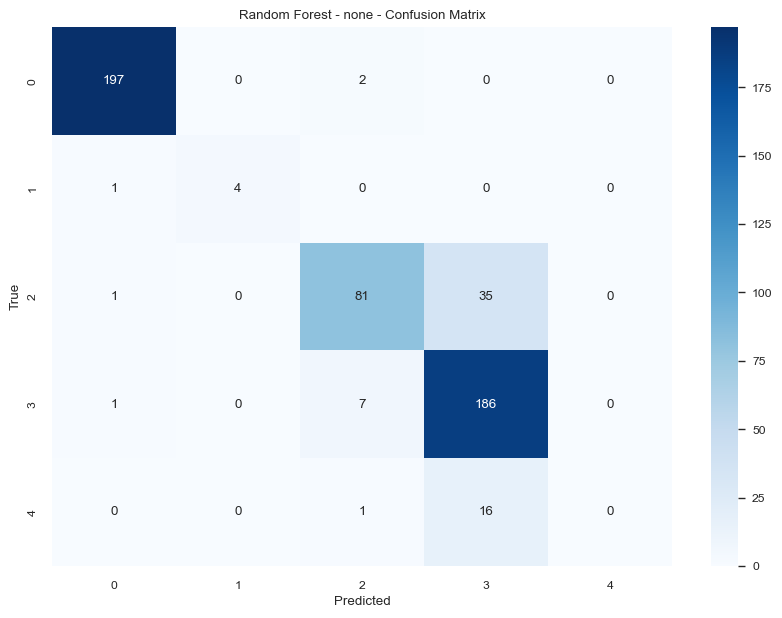

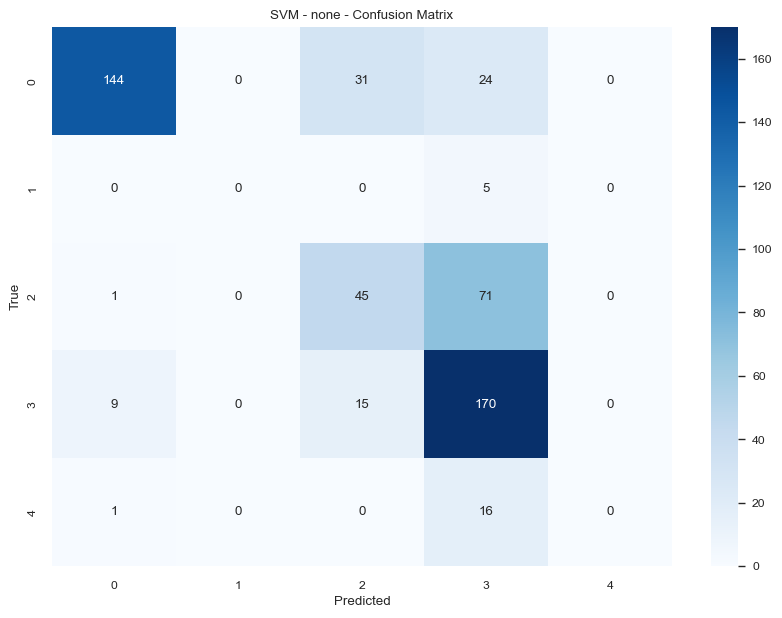

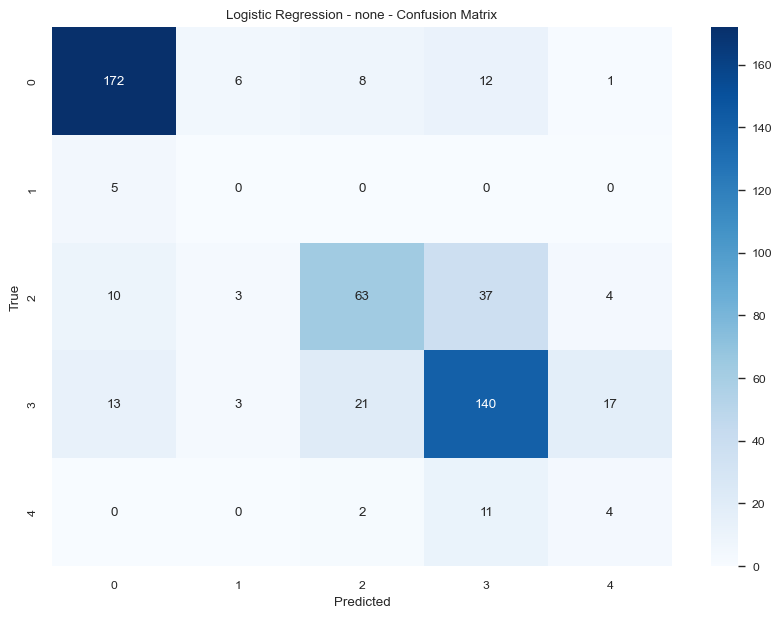

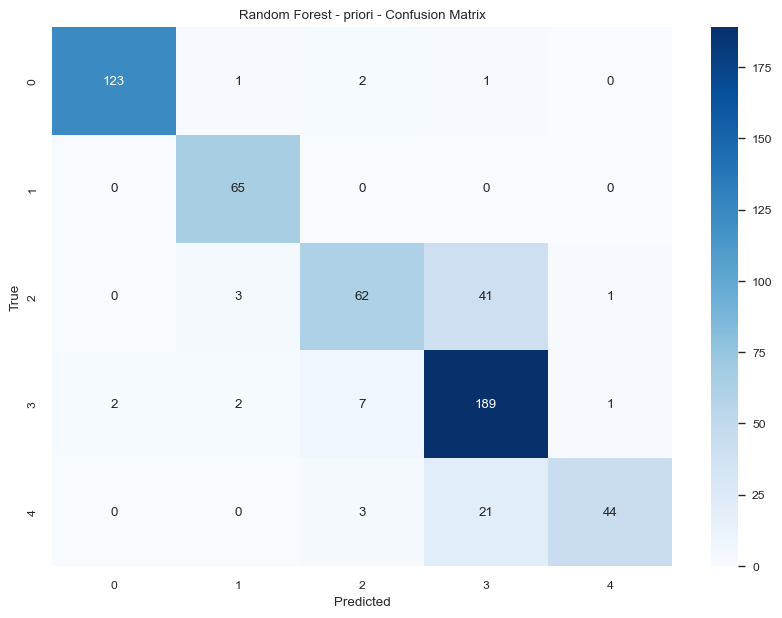

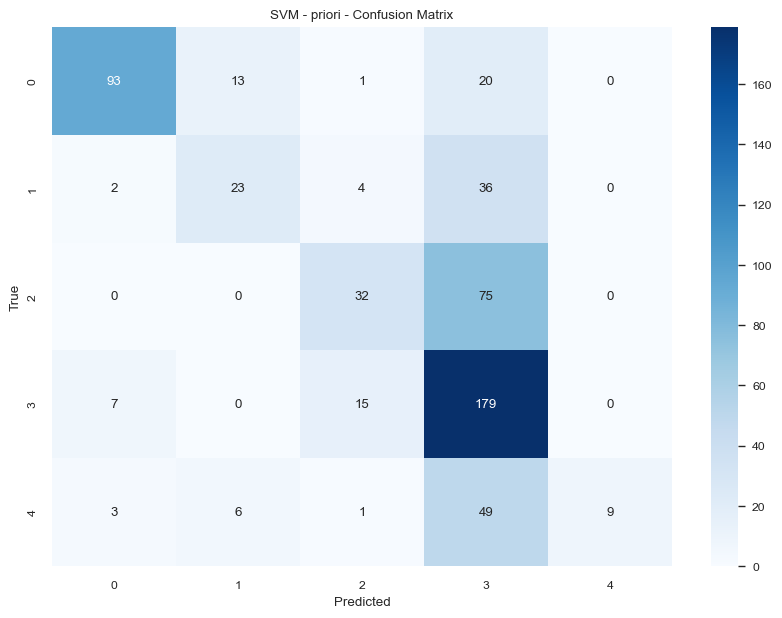

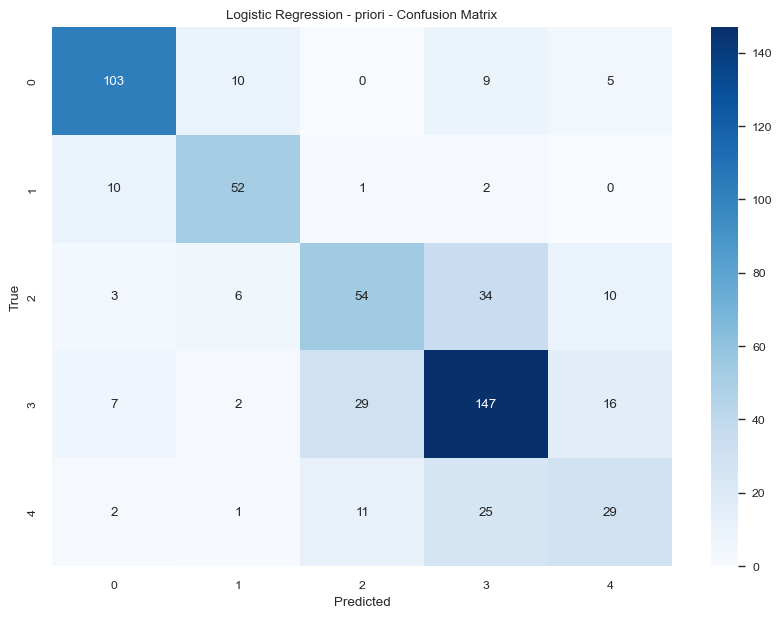

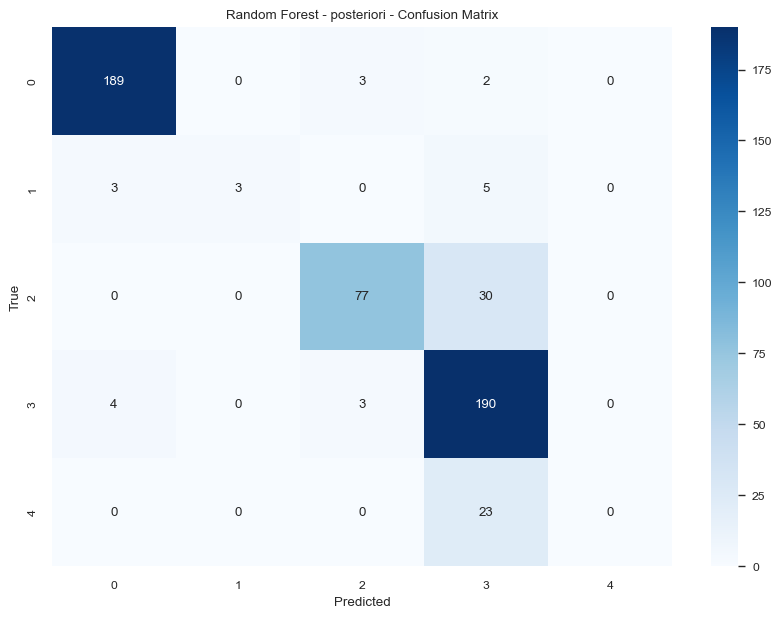

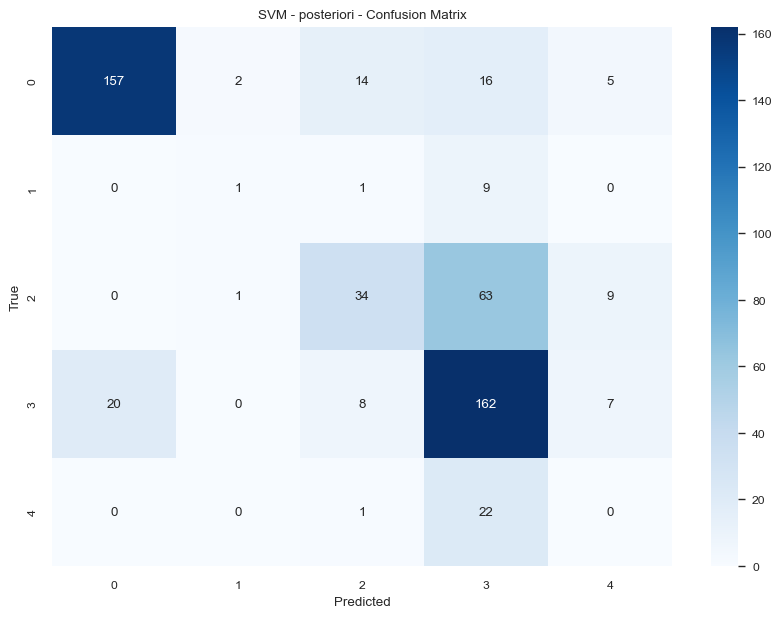

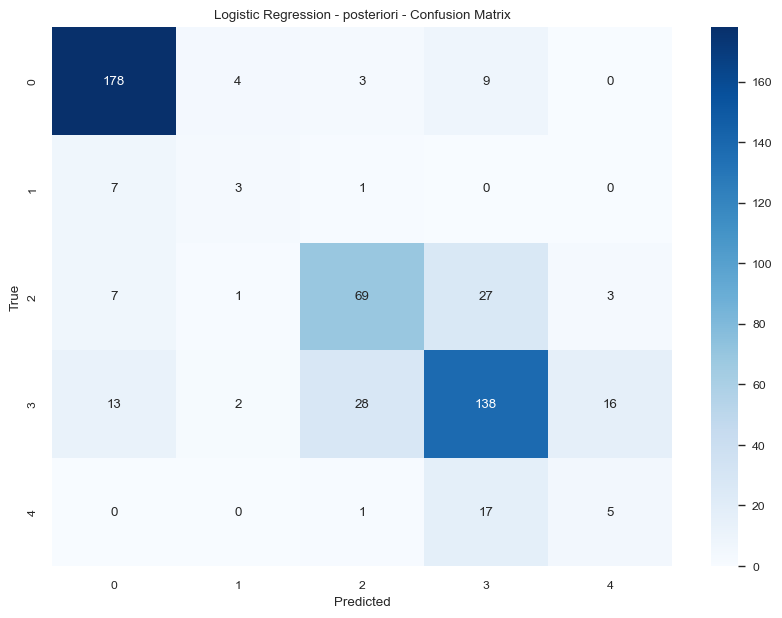

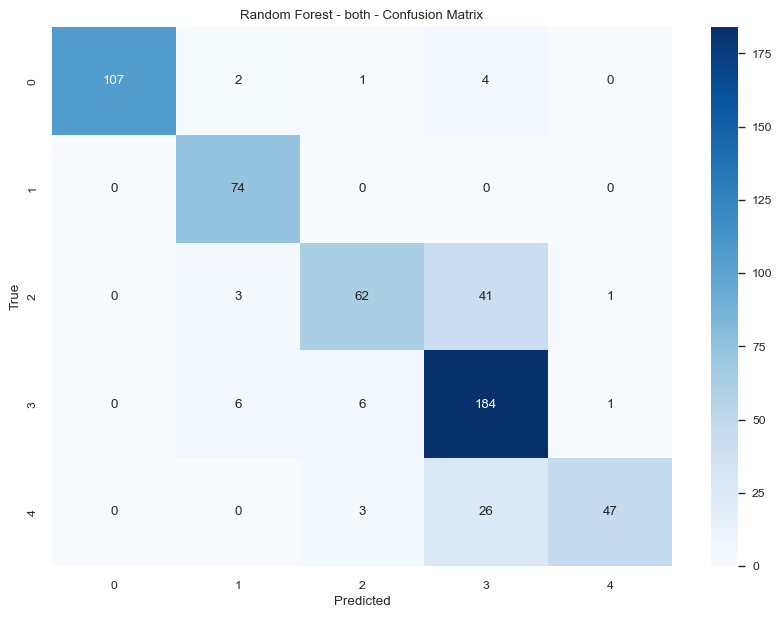

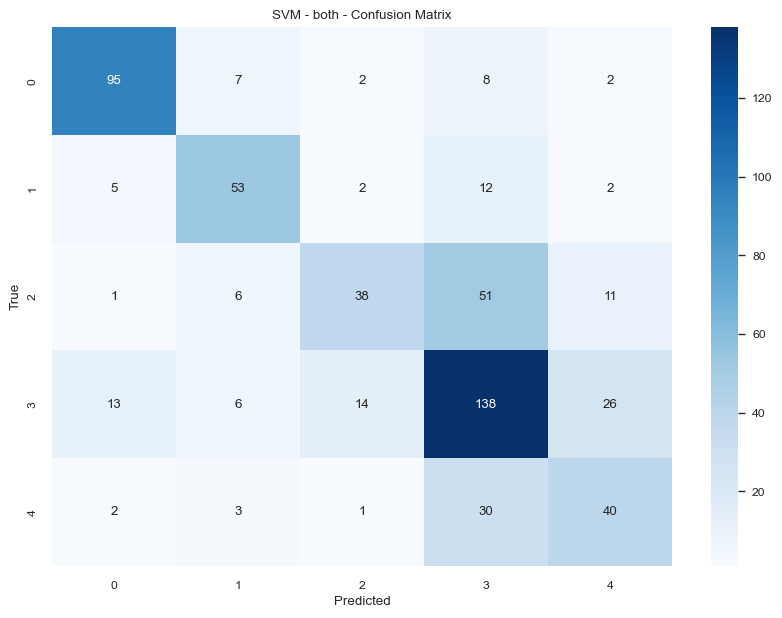

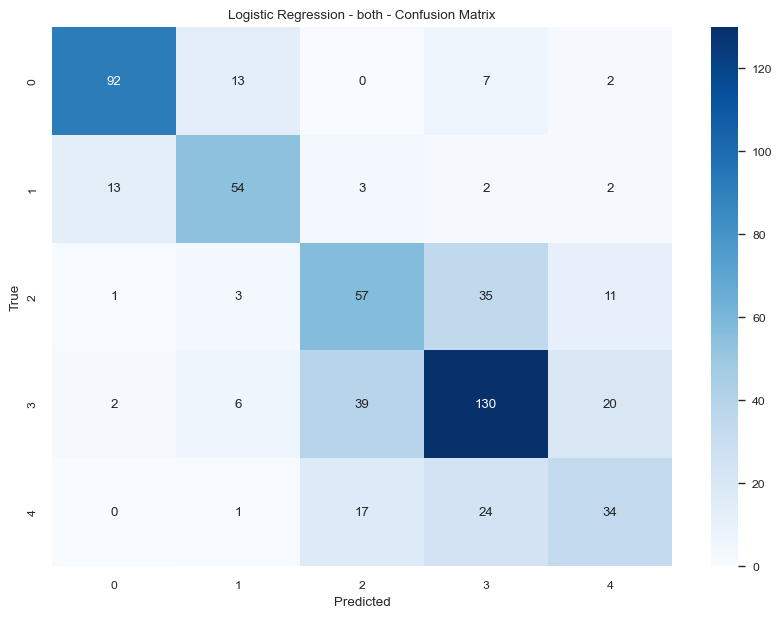

In [50]:
# ----------------------------------------- Create DataFrame to store results-----------------------------------------
balancing_types = ["none", "priori", "posteriori", "both"]
result_df = pd.DataFrame(
    columns=balancing_types,
    index=["Random Forest", "SVM", "Logistic Regression"],
)

# ----------------------------------------- Loop over each feature-----------------------------------------
for type_ in balancing_types:

    # take the correct path
    if type_ == 'none':
        FEATURES = FEATURES_BASE + 'raw/'
    else:
        FEATURES = FEATURES_BASE + f'balanced/{type_}/'

    # Load the data
    FEATURES_NAME = f'full_data_{type_}_bal_{INTERVAL}s_4000hz_30mfcc_12chroma_70cqt_41rms_41zcr_41sc_61sb_41sr.npy'
    full_data = np.load(FEATURES + FEATURES_NAME, allow_pickle=True).item()

    # Extract data from the dictionary
    X_train = full_data["train"]["X"]
    y_train = full_data["train"]["y"]
    X_test = full_data["test"]["X"]
    y_test = full_data["test"]["y"]

    # Train and evaluate models: Random Forest, SVM, Logistic Regression
    for model_name, clf in {
        "Random Forest": RandomForestClassifier(random_state=SEED),
        "SVM": SVC(random_state=SEED),
        "Logistic Regression": LogisticRegression(random_state=SEED, max_iter=1000),
    }.items():
        print(f"Training {model_name}\n")
        clf.fit(X_train, y_train)
        #score = clf.score(X_test, y_test)
        #score = clf.score(X_train, y_train)
        
        # macrof1
        y_pred = clf.predict(X_test)
        score = f1_score(y_test, y_pred, average='macro')
        
        # cf
        y_pred = clf.predict(X_test)
        cf = confusion_matrix(y_test, y_pred)
         
        # plot cf
        plt.figure(figsize=(10, 7))
        sns.heatmap(cf, annot=True, cmap="Blues", fmt="d")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(f"{model_name} - {type_} - Confusion Matrix")
        
        result_df.loc[model_name, type_] = score

# ----------------------------------------- Save the results-----------------------------------------
result_df.to_csv(MODELS_RESULTS + RESULT_NAME)
result_df

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'none'),
  Text(0, 1.5, 'priori'),
  Text(0, 2.5, 'posteriori'),
  Text(0, 3.5, 'both')])

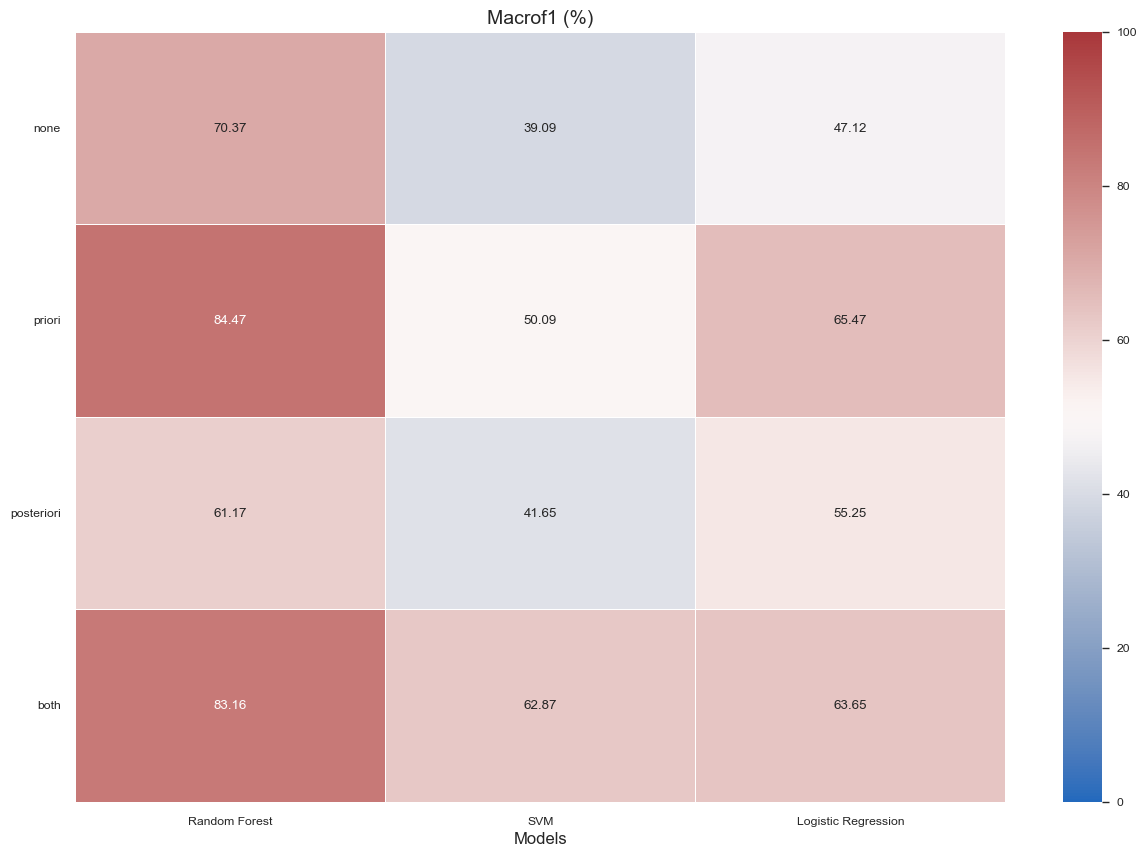

In [48]:
result_df = pd.read_csv(MODELS_RESULTS + RESULT_NAME, index_col=0).transpose()

plt.figure(figsize=(15, 10))
sns.set_theme(context="paper", font_scale=1)

sns.heatmap(result_df.astype(float) * 100, annot=True, cmap="vlag", fmt=".2f",vmax=100,vmin=0,linewidths=0.5)
#plt.title("Accuracy (%)", fontsize=14)
plt.title("Macrof1 (%)", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.yticks(rotation=0)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'none'),
  Text(0, 1.5, 'priori'),
  Text(0, 2.5, 'posteriori'),
  Text(0, 3.5, 'both')])

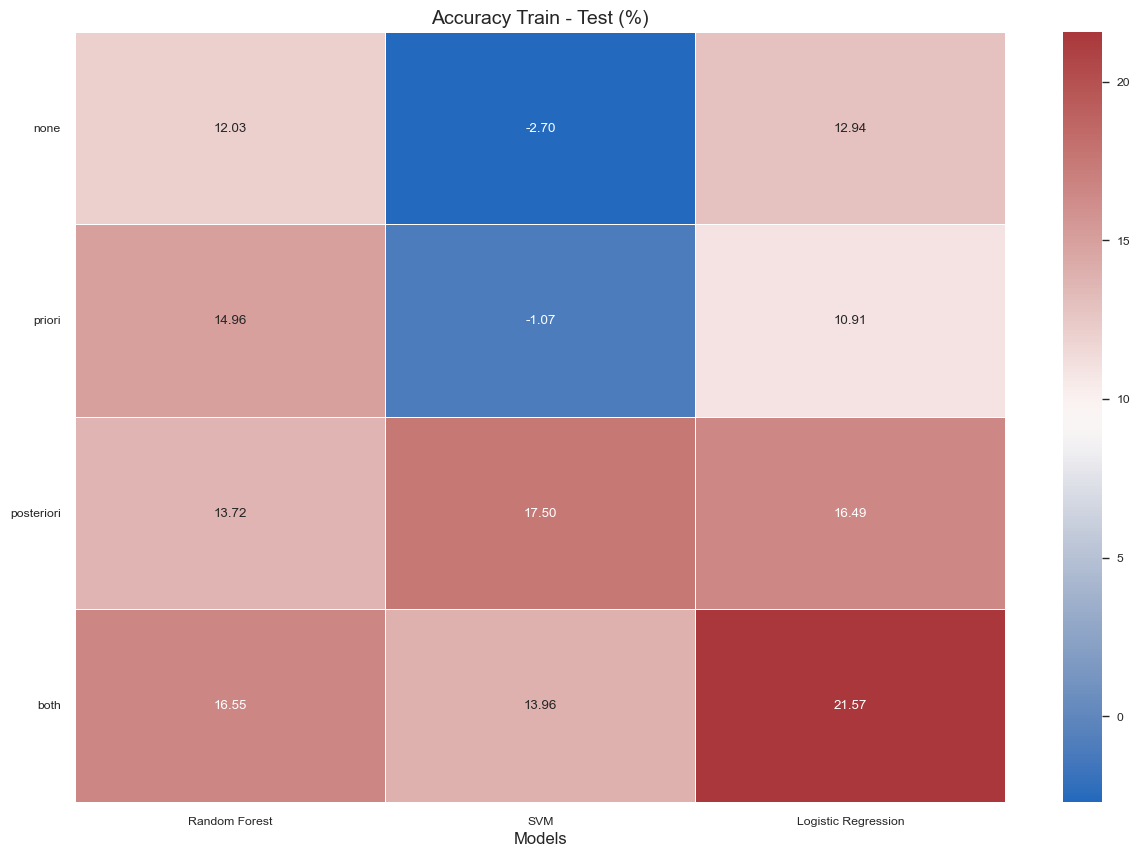

In [41]:
RESULT_NAME = "results_balancing_comparison_train.csv"
result_df_train = pd.read_csv(MODELS_RESULTS + RESULT_NAME, index_col=0).transpose()

RESULT_NAME = "results_balancing_comparison_test.csv"
result_df_test = pd.read_csv(MODELS_RESULTS + RESULT_NAME, index_col=0).transpose()

# difference
result_df = result_df_train - result_df_test

plt.figure(figsize=(15, 10))
sns.set_theme(context="paper", font_scale=1)

sns.heatmap(result_df.astype(float) * 100, annot=True, cmap="vlag", fmt=".2f",linewidths=0.5)
plt.title("Accuracy Train - Test (%)", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.yticks(rotation=0)